## Applied on PHS

In [1]:
import numpy as np
#import tensorflow as tf
from matplotlib import pyplot as plt
import glob
import random


In [2]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

## Quicklens Map

In [3]:
path="./periodic_background/"
#tot = np.load(path+"1PHS6Events_Nside2048_d0_d80_BKG_"+str(0)+".npy")

qlbkgs = np.empty((0, 720, 720))
for evnts in range(2):
    temp = np.load(path+"500_events_720Sqr_lensed_uncutBackgroundlmax3500_"+str(evnts)+".npy")

    qlbkgs = np.concatenate((qlbkgs,temp))

In [4]:
# FFT on planted signals
pathsig = '/afs/crc.nd.edu/user/t/tkim12/Work/CMB_ML/Data/Nside1024/test_img/'

PHSsignals = []
for batch in range(1,4):
    temp = np.load(pathsig+"sig_larger/100_PHS_720sq_g1_Sig_onLSS_"+str(batch)+".npy")
    for evnt in range(len(temp)):
        PHSsignals.append(temp[evnt])

PHSsignals = np.array(PHSsignals)

In [5]:
def Nphscalc(rescale_val = 6, num_select = 1, Tcut = 340, puresig = PHSsignals, purepkg = qlbkgs, selec_evnt = 1000):
    
    selected_evnts = []

    for tries in range(selec_evnt):
        gen_list = np.random.choice(range(0,150), num_select, replace = False).reshape(-1,num_select)
        selected_evnts.append(gen_list[0])

    selected_evnts = np.array(selected_evnts)

    #selected_evnts = np.load('selected_rand_list_'+str(num_select)+'PHS.npy')
    
    PHSsig = []
    PHSsig_loc = []
    for events in range(len(selected_evnts)):
        temp = 0
        temp_loc = []
        for num in range(num_select):
            temp += PHSsignals[selected_evnts[events,num]]
            test = PHSsignals[selected_evnts[events,num]]
            test_loc = np.where((test==test.max()))
            test_locx = int(np.mean(test_loc[0]))
            test_locy = int(np.mean(test_loc[1]))
            temp_loc.append([test_locx,test_locy])
        PHSsig.append(temp)
        PHSsig_loc.append(temp_loc)
    
    PHSsig = rescale_val * np.array(PHSsig)
    PHSsig_loc = np.array(PHSsig_loc)
    
    qlBkpSig = qlbkgs[:selec_evnt]+PHSsig

    lis1 = []
    lis2 = []
    
    for ii in range(len(qlBkpSig)):
        lis1.append(len(qlBkpSig[ii][qlBkpSig[ii]-np.mean(qlBkpSig[ii])>Tcut]))
        lis2.append(len(qlbkgs[:selec_evnt][ii][qlbkgs[:selec_evnt][ii]-np.mean(qlbkgs[:selec_evnt][ii])>Tcut]))
    
    lis1 = np.array(lis1)
    lis2 = np.array(lis2)
    
    return len(qlBkpSig[qlBkpSig>Tcut])/selec_evnt, lis1, len(qlbkgs[:selec_evnt][qlbkgs[:selec_evnt]>Tcut])/selec_evnt,lis2

In [6]:
#
# g = 2, N = 635
# g = 3, N = 274
# g = 6, N = 48

In [7]:
g6bkgpsig,g6bkgpsigev,g6bkg,g6bkgev = Nphscalc(rescale_val = 6, num_select = 2, Tcut = 340, puresig = PHSsignals, purepkg = qlbkgs)

In [8]:
g3bkgpsig,g3bkgpsigev,g3bkg,g3bkgev = Nphscalc(rescale_val = 3, num_select = 11, Tcut = 200, puresig = PHSsignals, purepkg = qlbkgs)

In [9]:
g2bkgpsig,g2bkgpsigev,g2bkg,g2bkgev = Nphscalc(rescale_val = 2, num_select = 25, Tcut = 160, puresig = PHSsignals, purepkg = qlbkgs)

In [10]:
print(g6bkgpsigev.min(),g6bkgpsigev.mean(),g6bkgpsigev.max())
print(g3bkgpsigev.min(),g3bkgpsigev.mean(),g3bkgpsigev.max())
print(g2bkgpsigev.min(),g2bkgpsigev.mean(),g2bkgpsigev.max())

134 368.258 980
11222 14982.232 21012
27846 33365.077 41816


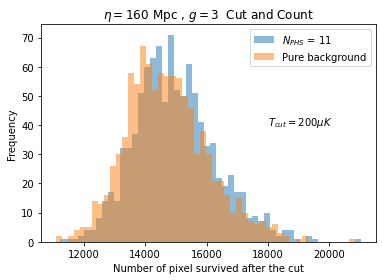

In [33]:
plt.hist(g3bkgpsigev,50,alpha = 0.5,label = r'$N_{PHS}$ = 11')
plt.hist(g3bkgev,50,alpha = 0.5,label = 'Pure background')
plt.title(r"$\eta = 160$ Mpc , $g = 3$  Cut and Count")
plt.legend()

plt.text(18000, 40, r'$T_{cut} = 200 \mu K$')
plt.xlabel('Number of pixel survived after the cut')
plt.ylabel('Frequency')
plt.savefig("cut_count_result_eta160_g3_N11.pdf",bbox_inches='tight')

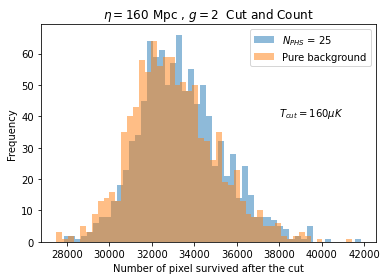

In [35]:
plt.hist(g2bkgpsigev,50,alpha = 0.5,label = r'$N_{PHS}$ = 25')
plt.hist(g2bkgev,50,alpha = 0.5,label = 'Pure background')
plt.title(r"$\eta = 160$ Mpc , $g = 2$  Cut and Count")
plt.legend()

plt.text(38000, 40, r'$T_{cut} = 160 \mu K$')
plt.xlabel('Number of pixel survived after the cut')
plt.ylabel('Frequency')
plt.savefig("cut_count_result_eta160_g2_N25.pdf",bbox_inches='tight')

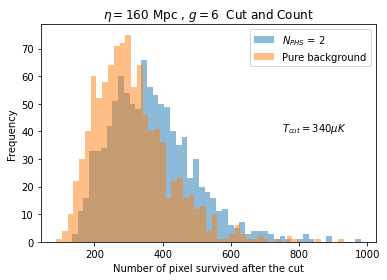

In [40]:
plt.hist(g6bkgpsigev,50,alpha = 0.5,label = r'$N_{PHS}$ = 2')
plt.hist(g6bkgev,50,alpha = 0.5,label = 'Pure background')
plt.title(r"$\eta = 160$ Mpc , $g = 6$  Cut and Count")
plt.legend()

plt.text(750, 40, r'$T_{cut} = 340 \mu K$')
plt.xlabel('Number of pixel survived after the cut')
plt.ylabel('Frequency')
plt.savefig("cut_count_result_eta160_g6_N2.pdf",bbox_inches='tight')

In [14]:
print(g6bkgpsig,np.sqrt(g6bkgpsig),np.std(g6bkgpsigev))
print(g6bkg,np.sqrt(g6bkg),np.std(g6bkgev))

369.535 19.223293162202985 124.7164040373198
310.574 17.62310982772337 111.08148596413356


In [15]:
print(g3bkgpsig,np.sqrt(g3bkgpsig), np.std(g3bkgpsigev))
print(g3bkg,np.sqrt(g3bkg), np.std(g3bkgpsigev))

15084.098 122.81733590987878 1335.7511258374443
14713.538 121.29937345262753 1335.7511258374443


In [16]:
print(g2bkgpsig,np.sqrt(g2bkgpsig), np.std(g2bkgpsigev))
print(g2bkg,np.sqrt(g2bkg), np.std(g2bkgpsigev))

33661.345 183.4702836973879 1977.7421118717677
33033.345 181.75077716477583 1977.7421118717677


In [17]:
print(np.abs(g6bkgpsig-g6bkg))
print(np.sqrt(2*g6bkg))

58.96100000000001
24.92284092955697


In [18]:
print(np.abs(g3bkgpsig-g3bkg))
print(np.sqrt(2*g3bkg))

370.5599999999995
171.5432190440648


In [19]:
print(np.abs(g2bkgpsig-g2bkg))
print(np.sqrt(2*g2bkg))

628.0
257.0344140382762


In [20]:
g1bkgpsig, g1bkg = Nphscalc(rescale_val = 1, num_select = 30, Tcut = 80, puresig = PHSsignals, purepkg = qlbkgs)

ValueError: too many values to unpack (expected 2)

In [ ]:
print(g1bkgpsig,np.sqrt(g1bkgpsig))
print(g1bkg,np.sqrt(g1bkg))

## g = 6

In [24]:
# FFT on planted signals
pathsig = '/afs/crc.nd.edu/user/t/tkim12/Work/CMB_ML/Data/Nside1024/test_img/'

PHSsignals = []
for batch in range(1,4):
    temp = np.load(pathsig+"sig_larger/100_PHS_720sq_g1_Sig_onLSS_"+str(batch)+".npy")
    for evnt in range(len(temp)):
        PHSsignals.append(temp[evnt])

PHSsignals = np.array(PHSsignals)

rescale_val = 6
num_select = 1

In [25]:
selected_evnts = np.load('selected_rand_list_'+str(num_select)+'PHS.npy')

PHSsig = []
PHSsig_loc = []
for events in range(len(selected_evnts)):
    temp = 0
    temp_loc = []
    for num in range(num_select):
        temp += PHSsignals[selected_evnts[events,num]]
        test = PHSsignals[selected_evnts[events,num]]
        test_loc = np.where((test==test.max()))
        test_locx = int(np.mean(test_loc[0]))
        test_locy = int(np.mean(test_loc[1]))
        temp_loc.append([test_locx,test_locy])
    PHSsig.append(temp)
    PHSsig_loc.append(temp_loc)
    
PHSsig = rescale_val * np.array(PHSsig)
PHSsig_loc = np.array(PHSsig_loc)

In [33]:
qlBkpSig = qlbkgs[:500]+PHSsig

print(len(qlBkpSig[qlBkpSig>340]))

print(len(qlbkgs[:500][qlbkgs[:500]>340]))

171674
156032


In [32]:
30/np.sqrt(156032)

0.07594766342675456

In [27]:
qlBkpSig = qlbkgs[:500]+PHSsig

print(len(qlBkpSig[qlBkpSig>340]))

print(len(qlbkgs[:500][qlbkgs[:500]>340]))

171674
156032


In [17]:
313/25

12.52